# Уравнение теплопроводности с переменными коэффициентами

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

$\frac{\partial}{\partial t}u(x,t)=\frac{\partial}{\partial x}(k(u)\frac{\partial}{\partial x}u(x,t)) + g(x,t), \quad 0 \leq x \leq 1, 0 \leq t \leq T \quad (1)$

$u(x,0) = u^0(x), \quad u(x,t)|_{\gamma} = b(x,t)$

Пусть $k(u) = \frac{1}{2}u^2$

Рассмотрим тестовое решение: $u(x,t) = 
\begin{cases}
\sqrt{t - x}, \quad x \leq t \\
0, \quad x > t
\end{cases}$

$u(x, 0) = 0$

$u(0, t) = \sqrt{t}, \quad u(1, t) = 
\begin{cases}
\sqrt{t - 1}, \quad t \geq 1 \\
0, \quad t < 1
\end{cases}$

Подставим тестовое решение в $(1)$:

$\frac{1}{2\sqrt{t - x}} = \frac{\partial}{\partial x}\Big(\frac{t - x}{2} \cdot \big(-\frac{1}{2\sqrt{t - x}}\big)\Big)  + g(x,t) \implies \frac{1}{2\sqrt{t - x}} = \frac{\partial}{\partial x}\big(- \frac{t - x}{4\sqrt{t - x}}\big)  + g(x,t) \implies \frac{1}{2\sqrt{t - x}} = \frac{1}{8\sqrt{t - x}}  + g(x,t) \implies \frac{3}{8\sqrt{t - x}} = g(x,t)$

$g(x, t) = 
\begin{cases}
\frac{3}{8\sqrt{t - x}}, \quad x < t \\
0, \quad x \geq t
\end{cases}$

# Точное решение

In [2]:
N_x, N_t = 100, 1000

x = np.linspace(0, 1, N_x)
t = np.linspace(0, 1, N_t)
xx, tt = np.meshgrid(x, t)
        
u = np.zeros((N_t, N_x))
for n in range(N_t):
    for j in range(N_x):
        if xx[n, j] <= tt[n, j]:
            u[n, j] = np.sqrt(tt[n, j] - xx[n, j])
            
fig = go.Figure(data=go.Surface(x=xx, y=tt, z=u, colorscale='plotly3'))
fig.update_layout(scene = dict(xaxis_title='x', yaxis_title='t', zaxis_title='u'))

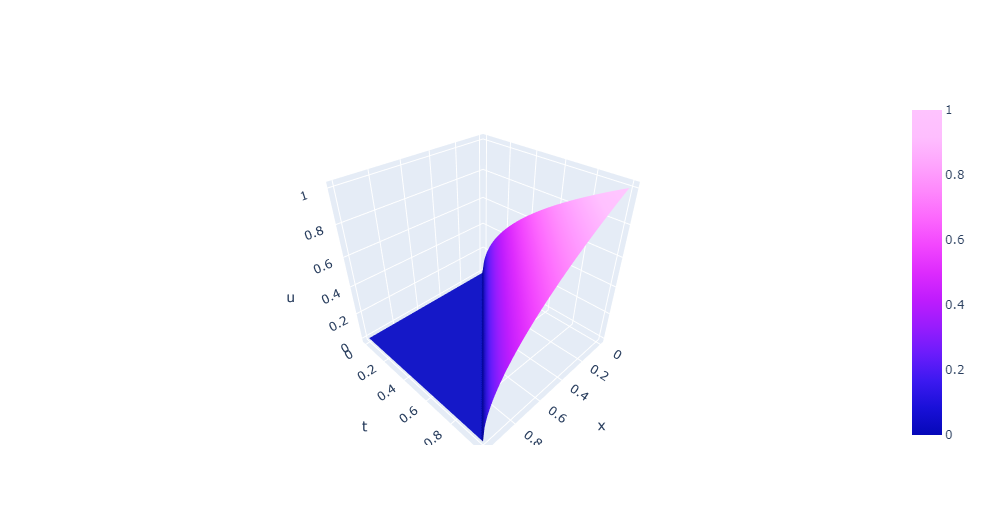

# Явный метод

$k^n_{j \pm \frac{1}{2}} = \frac{1}{2}\big(k^n_j + k^n_{j \pm 1} \big)$

$\Lambda u^n_j = \frac{1}{h} \Big(k^n_{j + \frac{1}{2}} \frac{u^n_{j+1} - u^n_j}{h} - k^n_{j - \frac{1}{2}}\frac{u^n_j - u^n_{j-1}}{h}\Big)$

$\Lambda u^n_j = \frac{u^{n+1}_j - u^n_j}{\tau} - g^n_j \implies \Lambda u^n_j  = \frac{u^{n+1}_j - u^n_j}{\tau} - \frac{3}{8\sqrt{t_n - x_j}} \implies u^{n+1}_j = \tau \Big(\Lambda u^n_j + \frac{3}{8\sqrt{t_n - x_j}}\Big) + u^n_j$

$u^{n+1}_j = \tau \Big(\frac{1}{h} \Big(k^n_{j + \frac{1}{2}} \frac{u^n_{j+1} - u^n_j}{h} - k^n_{j - \frac{1}{2}}\frac{u^n_j - u^n_{j-1}}{h}\Big) + \frac{3}{8\sqrt{t_n - x_j}}\Big) + u^n_j$

$u^{n+1}_j = \tau \Big(\frac{1}{h^2} \Big(k^n_{j + \frac{1}{2}} (u^n_{j+1} - u^n_j) - k^n_{j - \frac{1}{2}}(u^n_j - u^n_{j-1})\Big) + \frac{3}{8\sqrt{t_n - x_j}}\Big) + u^n_j$

$u^{n+1}_j = 
\begin{cases}
\tau \Big(\frac{1}{h^2} \Big(k^n_{j + \frac{1}{2}} (u^n_{j+1} - u^n_j) - k^n_{j - \frac{1}{2}}(u^n_j - u^n_{j-1})\Big) + \frac{3}{8\sqrt{t_n - x_j}}\Big) + u^n_j, \quad x < t \\
\frac{\tau}{h^2} \Big(k^n_{j + \frac{1}{2}} (u^n_{j+1} - u^n_j) - k^n_{j - \frac{1}{2}}(u^n_j - u^n_{j-1})\Big)+ u^n_j, \quad x \geq t
\end{cases}$

In [3]:
N_x, N_t = 100, 10000
h = 1 / N_x
tau = 1 / N_t

x = np.linspace(0, 1, N_x)
t = np.linspace(0, 1, N_t)
xx, tt = np.meshgrid(x, t)

u = np.zeros((N_t, N_x))
u[:, 0] = np.sqrt(t)
for n in range(N_t):
    if t[n] >= 1:
        u[n, -1] = np.sqrt(t[n] - 1)
        
for n in range(N_t - 1):
    for j in range(1, N_x - 1):
        
        k1 = (u[n, j] ** 2 + u[n, j + 1] ** 2) / 4
        k2 = (u[n, j] ** 2 + u[n, j - 1] ** 2) / 4
        Lambda = (k1 * (u[n, j + 1] - u[n, j]) - k2 * (u[n, j] - u[n, j - 1])) / (h ** 2)
        
        if t[n] > x[j]:
            u[n + 1, j] = tau * (Lambda + 3 / (8 * np.sqrt(t[n] - x[j]))) + u[n, j]
        else:
            u[n + 1, j] = tau * Lambda + u[n, j]

fig = go.Figure(data=go.Surface(x=xx, y=tt, z=u, colorscale='plotly3'))
fig.update_layout(scene = dict(xaxis_title='x', yaxis_title='t', zaxis_title='u'))

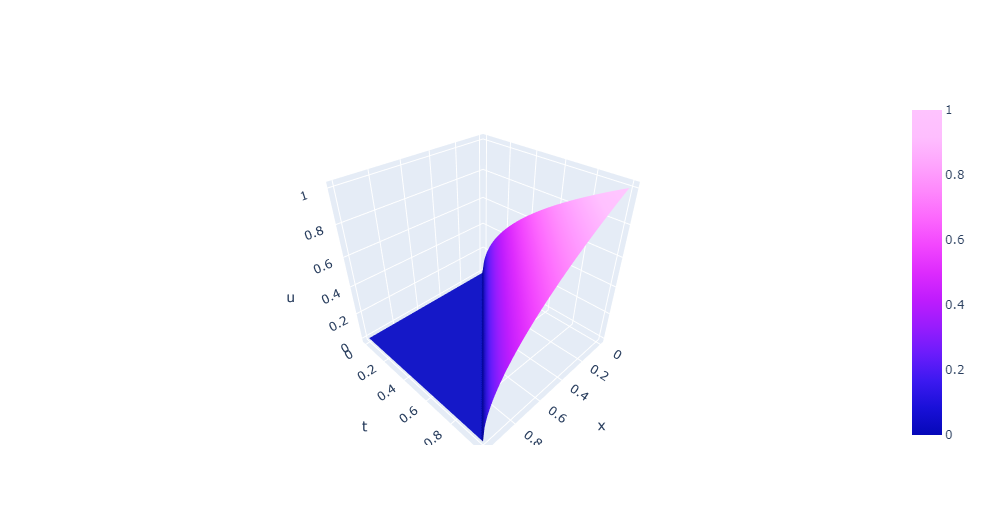

# Вычислим норму $||u||$ для различных $N_x$

In [4]:
N_x = np.array([10, 20, 40, 80, 160])
N_t = np.array([200, 400, 2000, 8000, 25600])

norm1 = np.array([])

for i in range(len(N_x)):
    
    h = 1 / N_x[i]
    tau = 1 / N_t[i]

    x = np.linspace(0, 1, N_x[i])
    t = np.linspace(0, 1, N_t[i])
    xx, tt = np.meshgrid(x, t)
    
    U = np.zeros((N_t[i], N_x[i]))
    for n in range(N_t[i]):
        for j in range(N_x[i]):
            if xx[n, j] <= tt[n, j]:
                U[n, j] = np.sqrt(tt[n, j] - xx[n, j])

    u = np.zeros((N_t[i], N_x[i]))
    u[:, 0] = np.sqrt(t)
    for n in range(N_t[i]):
        if t[n] >= 1:
            u[n, -1] = np.sqrt(t[n] - 1)

    for n in range(N_t[i] - 1):
        for j in range(1, N_x[i] - 1):

            k1 = (u[n, j] ** 2 + u[n, j + 1] ** 2) / 4
            k2 = (u[n, j] ** 2 + u[n, j - 1] ** 2) / 4
            Lambda = (k1 * (u[n, j + 1] - u[n, j]) - k2 * (u[n, j] - u[n, j - 1])) / (h ** 2)

            if t[n] > x[j]:
                u[n + 1, j] = tau * (Lambda + 3 / (8 * np.sqrt(t[n] - x[j]))) + u[n, j]
            else:
                u[n + 1, j] = tau * Lambda + u[n, j]
    
    norm1 = np.append(norm1, np.linalg.norm(u - U, np.inf) / np.linalg.norm(U, np.inf))

Text(0, 0.5, '$\\epsilon$')

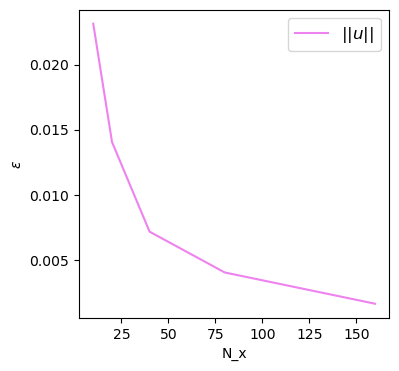

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(N_x, norm1, color = 'violet', label = '$||u||$')
ax.legend(fontsize = 12)
ax.set_xlabel('N_x')
ax.set_ylabel('$\epsilon$')

In [6]:
norm1

array([0.02313176, 0.01404468, 0.00716397, 0.00403183, 0.00163305])

# Метод прогонки

$k^n_{j \pm \frac{1}{2}} = \frac{1}{2}\big(k^n_j + k^n_{j \pm 1} \big)$

$\Lambda u^{n+1}_j = \frac{1}{h} \Big(k^n_{j + \frac{1}{2}} \frac{u^{n+1}_{j+1} - u^{n+1}_j}{h} - k^n_{j - \frac{1}{2}}\frac{u^{n+1}_j - u^{n+1}_{j-1}}{h}\Big)$

$\frac{u^{n+1}_j - u^n_j}{\tau} = \Lambda u^{n+1}_j + \frac{3}{8\sqrt{t_n - x_j}}$ 

$\frac{u^{n+1}_j - u^n_j}{\tau} = \frac{1}{h} \Big(k^n_{j + \frac{1}{2}} \frac{u^{n+1}_{j+1} - u^{n+1}_j}{h} - k^n_{j - \frac{1}{2}}\frac{u^{n+1}_j - u^{n+1}_{j-1}}{h}\Big) + \frac{3}{8\sqrt{t_n - x_j}}$

$\frac{\tau}{h^2}k^n_{j + \frac{1}{2}}u^{n+1}_{j+1} - (1 + \frac{\tau}{h^2} k^n_{j + \frac{1}{2}} + \frac{\tau}{h^2}k^n_{j - \frac{1}{2}})u^{n+1}_j + \frac{\tau}{h^2}k^n_{j - \frac{1}{2}}u^{n+1}_{j-1} + u^n_j + \frac{3\tau}{8\sqrt{t_n - x_j}} = 0$

$a_ju^{n+1}_{j+1} + b_ju^{n+1}_j + c_ju^{n+1}_{j-1} = d_j$

$a_j = \frac{\tau}{h^2}k^n_{j + \frac{1}{2}}, \quad b_j = -\big(1 + \frac{\tau}{h^2} k^n_{j + \frac{1}{2}} + \frac{\tau}{h^2}k^n_{j - \frac{1}{2}}\big) = -(1 + a_j + c_j), \quad c_j = \frac{\tau}{h^2}k^n_{j - \frac{1}{2}},  \quad d_j = \begin{cases}
-\big(u^n_j + \frac{3\tau}{8\sqrt{t_n - x_j}}\big), \quad t > x \\
- u^n_j , \quad t \leq x
\end{cases}$

Прямой ход: 

$\alpha_j = 
\begin{cases}
\frac{c_j}{b_j}, \quad j = 1 \\
\frac{c_j}{b_j - a_j\alpha_{j-1}}, \quad j = 2, 3, ..., N_x - 1
\end{cases}$

$\beta_j = 
\begin{cases}
\frac{d_j}{b_j}, \quad j = 1 \\
\frac{d_j - a_j\beta_{j-1}}{b_j - a_j\alpha_{j-1}}, \quad j = 2, 3, ..., N_x
\end{cases}$

Обратный ход:

$u^{n+1}_{N_x} = \beta_{N_x}$

$u^{n+1}_j = \beta_j - \alpha_j u^{n+1}_{j+1}, \quad j = N_x - 1, ..., 1$

In [7]:
def Thomas_algorithm(N_x, N_t):
    
    h = 1 / N_x
    tau = 1 / N_t

    x = np.linspace(0, 1, N_x)
    t = np.linspace(0, 1, N_t)
    xx, tt = np.meshgrid(x, t)

    u = np.zeros((N_t, N_x))
    u[:, 0] = np.sqrt(t)
    for n in range(N_t):
        if t[n] >= 1:
            u[n, -1] = np.sqrt(t[n] - 1)
    
    alpha = np.zeros(N_x)
    beta = np.zeros(N_x)
    
    for n in range(N_t - 1):
        
        a = np.zeros(N_t - 1)
        b = np.zeros(N_t - 1)
        c = np.zeros(N_t - 1)
        d = np.zeros(N_t - 1)
        
        alpha[0] = 0
        beta[0] = u[n, 0]
        
        for j in range(1, N_x - 1):
            
            k1 = (u[n, j] ** 2 + u[n, j + 1] ** 2) / 4
            k2 = (u[n, j] ** 2 + u[n, j - 1] ** 2) / 4
            
            a[j] = k2 * tau / (h ** 2)
            c[j] = k1 * tau / (h ** 2)
            b[j] = - (a[j] + c[j] + 1)
            
            if t[n] > x[j]:
                d[j] = - u[n, j] - 3 * tau / (8 * np.sqrt(t[n] - x[j]))
            else:
                d[j] = - u[n, j]
                
            alpha[j] = c[j] / (b[j] - a[j] * alpha[j - 1])
            beta[j] = ((d[j] - a[j] * beta[j - 1]) / (b[j] - a[j] * alpha[j - 1]))
        
        for j in range(N_x - 2, 0, -1):
            u[n + 1, j] = beta[j] - alpha[j] * u[n + 1, j + 1]
    
    return u

In [8]:
N_x, N_t = 100, 10000
x = np.linspace(0, 1, N_x)
t = np.linspace(0, 1, N_t)
xx, tt = np.meshgrid(x, t)
uu = Thomas_algorithm(N_x, N_t)
fig = go.Figure(data=go.Surface(x=xx, y=tt, z=uu, colorscale='plotly3'))
fig.update_layout(scene = dict(xaxis_title='x', yaxis_title='t', zaxis_title='u'))

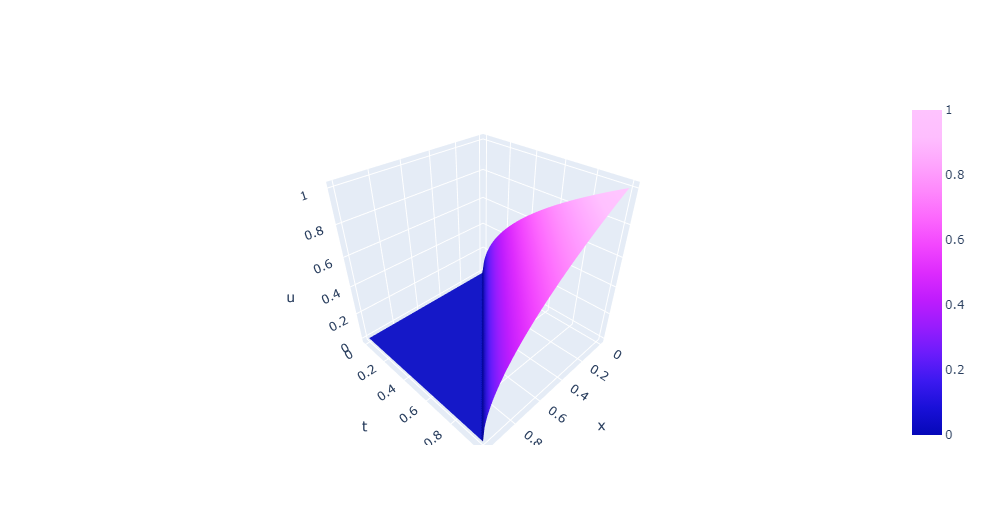

# Вычислим норму $||u||$ для различных $N_x$

In [9]:
N_x = np.array([10, 20, 40, 80, 160])
N_t = np.array([101, 200, 400, 800, 1600])

norm2 = np.array([])

for i in range(len(N_x)):

    x = np.linspace(0, 1, N_x[i])
    t = np.linspace(0, 1, N_t[i])
    xx, tt = np.meshgrid(x, t)
    
    U = np.zeros((N_t[i], N_x[i]))
    for n in range(N_t[i]):
        for j in range(N_x[i]):
            if xx[n, j] <= tt[n, j]:
                U[n, j] = np.sqrt(tt[n, j] - xx[n, j])
            
    u = Thomas_algorithm(N_x[i], N_t[i])
    
    norm2 = np.append(norm2, np.linalg.norm(u - U, np.inf) / np.linalg.norm(U, np.inf))

Text(0, 0.5, '$\\epsilon$')

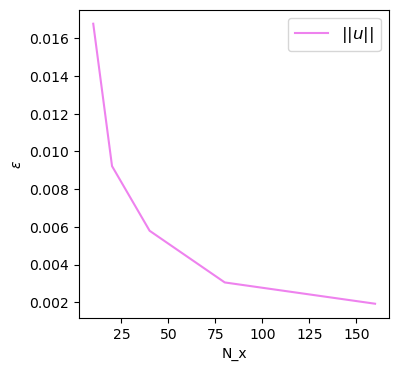

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(N_x, norm2, color = 'violet', label = '$||u||$')
ax.legend(fontsize = 12)
ax.set_xlabel('N_x')
ax.set_ylabel('$\epsilon$')

In [11]:
norm2

array([0.0167728 , 0.00922425, 0.00579701, 0.00305715, 0.00192914])

# Разностная схема с весами

$\frac{u^{n+1}_j - u^n_j}{\tau} = \sigma \Lambda u^{n+1}_j + (1 - \sigma) \Lambda u^n_j + g^n_{j,k}, \quad 1 \leq \sigma \leq 1 \text{ – весовой параметр} \quad (1)$

$k^n_{j \pm \frac{1}{2}} = \frac{1}{2}\big(k^n_j + k^n_{j \pm 1} \big)$

$\Lambda u^n_j = \frac{1}{h} \Big(k^n_{j + \frac{1}{2}} \frac{u^n_{j+1} - u^n_j}{h} - k^n_{j - \frac{1}{2}}\frac{u^n_j - u^n_{j-1}}{h}\Big)$

$\Lambda u^{n+1}_j = \frac{1}{h} \Big(k^n_{j + \frac{1}{2}} \frac{u^{n+1}_{j+1} - u^{n+1}_j}{h} - k^n_{j - \frac{1}{2}}\frac{u^{n+1}_j - u^{n+1}_{j-1}}{h}\Big)$

Подставим в $(1)$:

$\frac{u^{n+1}_j - u^n_j}{\tau} = \frac{\sigma}{h} \Big(k^n_{j + \frac{1}{2}} \frac{u^{n+1}_{j+1} - u^{n+1}_j}{h} - k^n_{j - \frac{1}{2}}\frac{u^{n+1}_j - u^{n+1}_{j-1}}{h}\Big) + \frac{1 - \sigma}{h} \Big(k^n_{j + \frac{1}{2}} \frac{u^{n}_{j+1} - u^{n}_j}{h} - k^n_{j - \frac{1}{2}}\frac{u^{n}_j - u^{n}_{j-1}}{h}\Big) + \frac{3}{8\sqrt{t_n - x_j}}$

Найдём коэффициенты для метода прогонки:

$u^{n+1}_j - u^n_j = \frac{\sigma \tau}{h^2} \Big(k^n_{j + \frac{1}{2}} \big(u^{n+1}_{j+1} - u^{n+1}_j \big) - k^n_{j - \frac{1}{2}}\big(u^{n+1}_j - u^{n+1}_{j-1}\big)\Big) + \frac{(1 - \sigma)\tau}{h^2} \Big(k^n_{j + \frac{1}{2}} \big(u^{n}_{j+1} - u^{n}_j\big) - k^n_{j - \frac{1}{2}}\big(u^{n}_j - u^{n}_{j-1}\big)\Big) + \frac{3\tau}{8\sqrt{t_n - x_j}}$

$\frac{\sigma \tau}{h^2} k^n_{j + \frac{1}{2}}u^{n+1}_{j+1} - \Big(1 + \frac{\sigma \tau}{h^2}k^n_{j + \frac{1}{2}} + \frac{\sigma \tau}{h^2}k^n_{j - \frac{1}{2}} \Big)u^{n+1}_j + \frac{\sigma \tau}{h^2} k^n_{j - \frac{1}{2}}u^{n+1}_{j-1} = -\frac{(1-\sigma) \tau}{h^2} k^n_{j + \frac{1}{2}}u^{n}_{j+1} + \Big(\frac{(1-\sigma) \tau}{h^2}k^n_{j + \frac{1}{2}} + \frac{(1-\sigma) \tau}{h^2}k^n_{j - \frac{1}{2}} - 1 \Big)u^{n}_j - \frac{(1-\sigma) \tau}{h^2} k^n_{j - \frac{1}{2}}u^{n}_{j-1} - \frac{3\tau}{8\sqrt{t_n - x_j}}$

$a_ju^{n+1}_{j+1} + b_ju^{n+1}_j + c_ju^{n+1}_{j-1} = d_j$

$a_j = \frac{\sigma \tau}{h^2} k^n_{j + \frac{1}{2}}, \quad b_j = - \Big(1 + \frac{\sigma \tau}{h^2}k^n_{j + \frac{1}{2}} + \frac{\sigma \tau}{h^2}k^n_{j - \frac{1}{2}} \Big) = -\big(1 + a_j + c_j\big), \quad c_j = \frac{\sigma \tau}{h^2} k^n_{j - \frac{1}{2}},$

$d_j = \begin{cases}
-\frac{(1-\sigma) \tau}{h^2} k^n_{j + \frac{1}{2}}u^{n}_{j+1} + \Big(\frac{(1-\sigma) \tau}{h^2}k^n_{j + \frac{1}{2}} + \frac{(1-\sigma) \tau}{h^2}k^n_{j - \frac{1}{2}} - 1 \Big)u^{n}_j - \frac{(1-\sigma) \tau}{h^2} k^n_{j - \frac{1}{2}}u^{n}_{j-1} - \frac{3\tau}{8\sqrt{t_n - x_j}}, \quad t > x \\
-\frac{(1-\sigma) \tau}{h^2} k^n_{j + \frac{1}{2}}u^{n}_{j+1} + \Big(\frac{(1-\sigma) \tau}{h^2}k^n_{j + \frac{1}{2}} + \frac{(1-\sigma) \tau}{h^2}k^n_{j - \frac{1}{2}} - 1 \Big)u^{n}_j - \frac{(1-\sigma) \tau}{h^2} k^n_{j - \frac{1}{2}}u^{n}_{j-1}, \quad t \leq x
\end{cases}$

In [12]:
def Thomas_algorithm(N_x, N_t, sigma):
    
    h = 1 / N_x
    tau = 1 / N_t

    x = np.linspace(0, 1, N_x)
    t = np.linspace(0, 1, N_t)
    xx, tt = np.meshgrid(x, t)

    u = np.zeros((N_t, N_x))
    u[:, 0] = np.sqrt(t)
    for n in range(N_t):
        if t[n] >= 1:
            u[n, -1] = np.sqrt(t[n] - 1)
    
    alpha = np.zeros(N_x)
    beta = np.zeros(N_x)
    
    for n in range(N_t - 1):
        
        a = np.zeros(N_t - 1)
        b = np.zeros(N_t - 1)
        c = np.zeros(N_t - 1)
        d = np.zeros(N_t - 1)
        
        p1 = sigma * tau / (h ** 2)
        p2 = (1 - sigma) * tau / (h ** 2)
        
        alpha[0] = 0
        beta[0] = u[n, 0]
        
        for j in range(1, N_x - 1):
            
            k1 = (u[n, j] ** 2 + u[n, j + 1] ** 2) / 4
            k2 = (u[n, j] ** 2 + u[n, j - 1] ** 2) / 4
            
            a[j] = p1 * k2
            c[j] = p1 * k1
            b[j] = - (a[j] + c[j] + 1)
            
            if t[n] > x[j]:
                g = 3 * tau / (8 * np.sqrt(t[n] - x[j]))
                d[j] = - p2 * (k1 * u[n, j + 1] + k2 * u[n, j - 1]) + (p2 * (k1 + k2) - 1) * u[n, j] - g
            else:
                d[j] = - p2 * (k1 * u[n, j + 1] + k2 * u[n, j - 1]) + (p2 * (k1 + k2) - 1) * u[n, j]
                
            alpha[j] = c[j] / (b[j] - a[j] * alpha[j - 1])
            beta[j] = ((d[j] - a[j] * beta[j - 1]) / (b[j] - a[j] * alpha[j - 1]))
        
        for j in range(N_x - 2, 0, -1):
            u[n + 1, j] = beta[j] - alpha[j] * u[n + 1, j + 1]
    
    return u

In [13]:
N_x, N_t = 100, 10000
x = np.linspace(0, 1, N_x)
t = np.linspace(0, 1, N_t)
xx, tt = np.meshgrid(x, t)
uu = Thomas_algorithm(N_x, N_t, 0.1)
fig = go.Figure(data=go.Surface(x=xx, y=tt, z=uu, colorscale='plotly3'))
fig.update_layout(scene = dict(xaxis_title='x', yaxis_title='t', zaxis_title='u'))

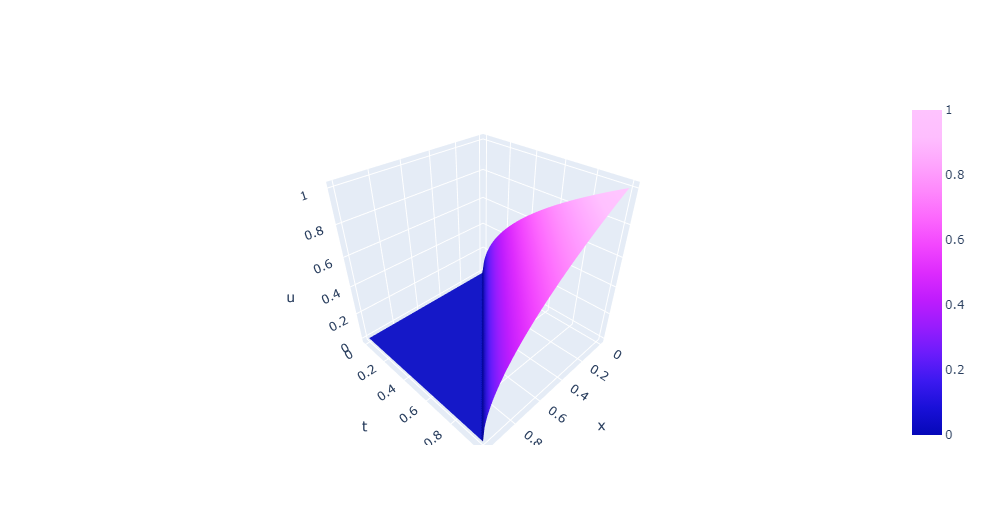

# Вычислим норму $||u||$ для различных $N_x$

In [14]:
N_x = np.array([10, 20, 40, 80, 160])
N_t = np.array([1500, 3000, 6000, 12000, 24000])

norm3 = np.array([])

for i in range(len(N_x)):

    x = np.linspace(0, 1, N_x[i])
    t = np.linspace(0, 1, N_t[i])
    xx, tt = np.meshgrid(x, t)
    
    U = np.zeros((N_t[i], N_x[i]))
    for n in range(N_t[i]):
        for j in range(N_x[i]):
            if xx[n, j] <= tt[n, j]:
                U[n, j] = np.sqrt(tt[n, j] - xx[n, j])
            
    u = Thomas_algorithm(N_x[i], N_t[i], 0.5)
    
    norm3 = np.append(norm3, np.linalg.norm(u - U, np.inf) / np.linalg.norm(U, np.inf))

Text(0, 0.5, '$\\epsilon$')

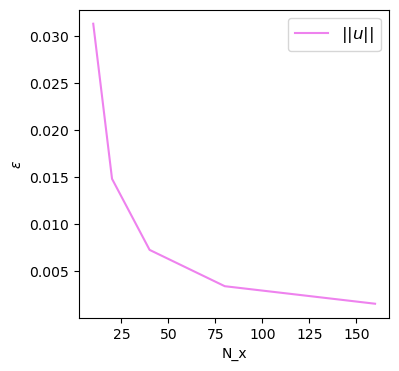

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(N_x, norm3, color = 'violet', label = '$||u||$')
ax.legend(fontsize = 12)
ax.set_xlabel('N_x')
ax.set_ylabel('$\epsilon$')

In [16]:
norm3

array([0.03135103, 0.01483993, 0.00727678, 0.00341159, 0.00154673])

# Cхема повышенной точности

$\frac{3}{2} \cdot \frac{u^{n+1}_j - u^n_j}{\tau} - \frac{1}{2} \cdot \frac{u^{n}_j - u^{n-1}_j}{\tau} = \Lambda u^{n+1}_j + f^{n+1}_{j}$

$\Lambda u^{n+1}_j = \frac{1}{h} \Big(k^n_{j + \frac{1}{2}} \frac{u^{n+1}_{j+1} - u^{n+1}_j}{h} - k^n_{j - \frac{1}{2}}\frac{u^{n+1}_j - u^{n+1}_{j-1}}{h}\Big)$

$\frac{3}{2} \cdot \frac{u^{n+1}_j - u^n_j}{\tau} - \frac{1}{2} \cdot \frac{u^{n}_j - u^{n-1}_j}{\tau} = \frac{1}{h} \Big(k^n_{j + \frac{1}{2}} \frac{u^{n+1}_{j+1} - u^{n+1}_j}{h} - k^n_{j - \frac{1}{2}}\frac{u^{n+1}_j - u^{n+1}_{j-1}}{h}\Big) + f^{n+1}_{j}$

$\frac{\tau}{h^2} k^n_{j + \frac{1}{2}} u^{n+1}_{j+1} - \big(\frac{3}{2} + \frac{\tau}{h^2} k^n_{j + \frac{1}{2}} + \frac{\tau}{h^2} k^n_{j - \frac{1}{2}} \big)u^{n+1}_j + \frac{\tau}{h^2} k^n_{j - \frac{1}{2}}  u^{n+1}_{j-1} = \frac{1}{2}u^{n-1}_j - 2u^{n}_j - \tau f^{n+1}_{j}$

$a_ju^{n+1}_{j+1} + b_ju^{n+1}_j + c_ju^{n+1}_{j-1} = d_j$

$a_j = \frac{\tau}{h^2} k^n_{j + \frac{1}{2}}, \quad b_j = \frac{3}{2} + \frac{\tau}{h^2} k^n_{j + \frac{1}{2}} + \frac{\tau}{h^2} k^n_{j - \frac{1}{2}} = -\big(\frac{3}{2} + a_j + c_j\big), \quad c_j = \frac{\tau}{h^2} k^n_{j - \frac{1}{2}}, d_j = \begin{cases}
\frac{1}{2}u^{n-1}_j - 2u^{n}_j - \frac{3\tau}{8\sqrt{t_n - x_j}}, \quad t > x \\
\frac{1}{2}u^{n-1}_j - 2u^{n}_j , \quad t \leq x
\end{cases}$ 

In [17]:
def Thomas_algorithm(N_x, N_t):
    
    h = 1 / N_x
    tau = 1 / N_t

    x = np.linspace(0, 1, N_x)
    t = np.linspace(0, 1, N_t)
    xx, tt = np.meshgrid(x, t)

    u = np.zeros((N_t, N_x))
    u[:, 0] = np.sqrt(t)
    for n in range(N_t):
        if t[n] >= 1:
            u[n, -1] = np.sqrt(t[n] - 1)
    
    for j in range(1, N_x - 1):

        k1 = (u[0, j] ** 2 + u[0, j + 1] ** 2) / 4
        k2 = (u[0, j] ** 2 + u[0, j - 1] ** 2) / 4
        Lambda = (k1 * (u[0, j + 1] - u[0, j]) - k2 * (u[0, j] - u[0, j - 1])) / (h ** 2)

        if t[0] > x[j]:
            u[1, j] = tau * (Lambda + 3 / (8 * np.sqrt(t[0] - x[j]))) + u[0, j]
        else:
            u[1, j] = tau * Lambda + u[0, j]
    
    alpha = np.zeros(N_x)
    beta = np.zeros(N_x)
    
    for n in range(N_t - 1):
        
        a = np.zeros(N_t - 1)
        b = np.zeros(N_t - 1)
        c = np.zeros(N_t - 1)
        d = np.zeros(N_t - 1)
        
        alpha[0] = 0
        beta[0] = u[n, 0]
        
        for j in range(1, N_x - 1):
            
            k1 = (u[n, j] ** 2 + u[n, j + 1] ** 2) / 4
            k2 = (u[n, j] ** 2 + u[n, j - 1] ** 2) / 4
            
            a[j] = k2 * tau / (h ** 2)
            c[j] = k1 * tau / (h ** 2)
            b[j] = - (a[j] + c[j] + 3 / 2)
            
            if t[n + 1] > x[j]:
                d[j] = 1 / 2 * u[n - 1, j] - 2 * u[n, j] - 3 * tau / (8 * np.sqrt(t[n + 1] - x[j]))
            else:
                d[j] = 1 / 2 * u[n - 1, j] - 2 * u[n, j]
                
            alpha[j] = c[j] / (b[j] - a[j] * alpha[j - 1])
            beta[j] = ((d[j] - a[j] * beta[j - 1]) / (b[j] - a[j] * alpha[j - 1]))
        
        for j in range(N_x - 2, 0, -1):
            u[n + 1, j] = beta[j] - alpha[j] * u[n + 1, j + 1]
    
    return u

In [18]:
N_x, N_t = 100, 10000
x = np.linspace(0, 1, N_x)
t = np.linspace(0, 1, N_t)
xx, tt = np.meshgrid(x, t)
uu = Thomas_algorithm(N_x, N_t)
fig = go.Figure(data=go.Surface(x=xx, y=tt, z=uu, colorscale='plotly3'))
fig.update_layout(scene = dict(xaxis_title='x', yaxis_title='t', zaxis_title='u'))

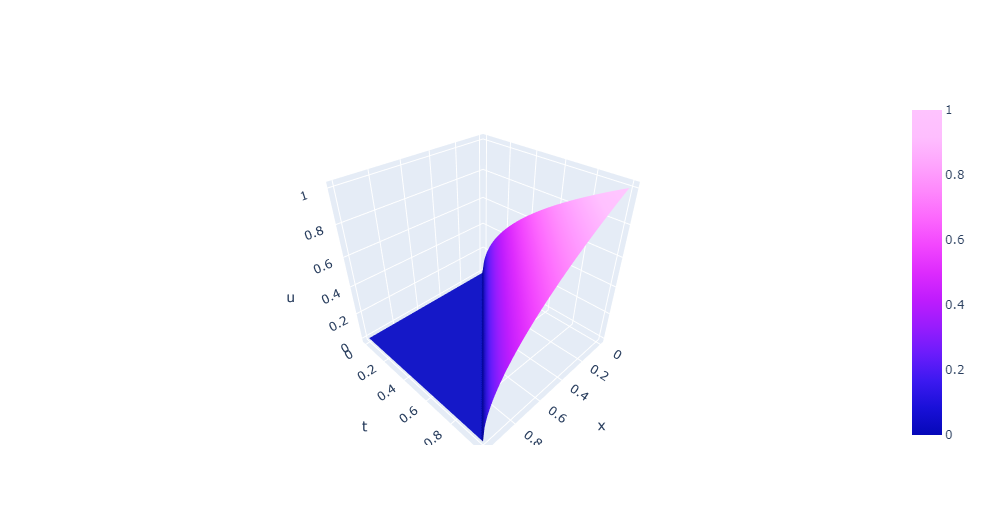

# Вычислим норму $||u||$ для различных $N_x$

In [19]:
N_x = np.array([10, 20, 40, 80, 160])
N_t = np.array([1500, 3000, 6000, 12000, 24000])

norm4 = np.array([])

for i in range(len(N_x)):

    x = np.linspace(0, 1, N_x[i])
    t = np.linspace(0, 1, N_t[i])
    xx, tt = np.meshgrid(x, t)
    
    U = np.zeros((N_t[i], N_x[i]))
    for n in range(N_t[i]):
        for j in range(N_x[i]):
            if xx[n, j] <= tt[n, j]:
                U[n, j] = np.sqrt(tt[n, j] - xx[n, j])
            
    u = Thomas_algorithm(N_x[i], N_t[i])
    
    norm4 = np.append(norm4, np.linalg.norm(u - U, np.inf) / np.linalg.norm(U, np.inf))

Text(0, 0.5, '$\\epsilon$')

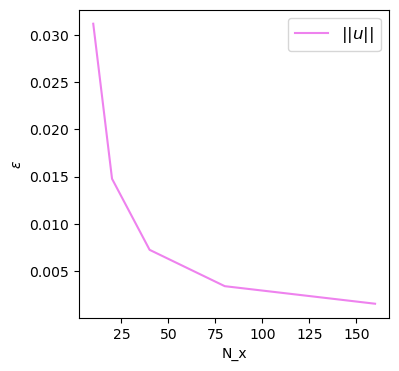

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(N_x, norm4, color = 'violet', label = '$||u||$')
ax.legend(fontsize = 12)
ax.set_xlabel('N_x')
ax.set_ylabel('$\epsilon$')

In [21]:
norm4

array([0.03117624, 0.01476302, 0.0072424 , 0.00339489, 0.00153741])

# Сравним все нормы $||u||$

Text(0, 0.5, '$\\epsilon$')

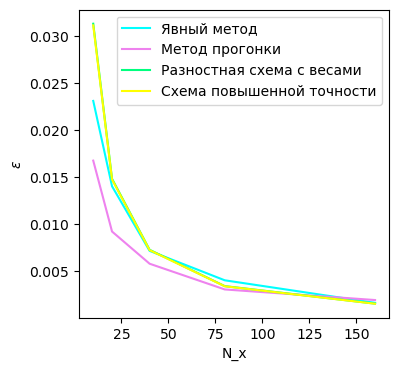

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(N_x, norm1, color = 'aqua', label = 'Явный метод')
ax.plot(N_x, norm2, color = 'violet', label = 'Метод прогонки')
ax.plot(N_x, norm3, color = 'SpringGreen', label = 'Разностная схема с весами')
ax.plot(N_x, norm4, color = 'yellow', label = 'Cхема повышенной точности')
ax.legend()
ax.set_xlabel('N_x')
ax.set_ylabel('$\epsilon$')

In [23]:
norm1

array([0.02313176, 0.01404468, 0.00716397, 0.00403183, 0.00163305])

In [24]:
norm2

array([0.0167728 , 0.00922425, 0.00579701, 0.00305715, 0.00192914])

In [25]:
norm3

array([0.03135103, 0.01483993, 0.00727678, 0.00341159, 0.00154673])

In [26]:
norm4

array([0.03117624, 0.01476302, 0.0072424 , 0.00339489, 0.00153741])